In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#set pd max rows
pd.set_option('display.max_rows', 500)

## Calculating salaries of individuals

In [3]:
bank1 = pd.read_csv('simulated_transaction_2024.csv')
bank1.shape

(230596, 7)

In [4]:
#bank1 = pd.read_csv('simulated_transactions_2024_wo_accountNo.csv')
#bank1.shape
#bank1.head()

In [5]:
bank = pd.read_csv('df.csv')
bank.shape

(230372, 7)

In [6]:
bank.head()

,Unnamed: 0,Account No,Balance,Amount,Third Party Account No,Third Party Name,DateTime
0,0,678330503.0,2971.0,1584.0,NaN,Westport Care Home,2023-01-01 00:00:00
1,1,472213568.0,3792.0,1950.0,NaN,Barbiee Boutique,2023-01-01 00:00:00
2,2,472213568.0,3012.0,-780.0,283027736.0,NaN,2023-01-01 00:00:00
3,3,283027736.0,1787.0,780.0,472213568.0,NaN,2023-01-01 00:00:00
4,4,624500124.0,3226.0,1825.0,NaN,Fat Face,2023-01-01 00:00:00


In [7]:
#null values
bank.isnull().sum()

Unnamed: 0                     0
Account No                     0
Balance                        0
Amount                         1
Third Party Account No    223543
Third Party Name            7075
DateTime                       0
dtype: int64

In [8]:
# split DateTime into Date and Time
bank['Date'] = pd.to_datetime(bank['DateTime'],dayfirst=False ).dt.date
bank['Timestamp'] = pd.to_datetime(bank['DateTime']).dt.time
bank.head()

,Unnamed: 0,Account No,Balance,Amount,Third Party Account No,Third Party Name,DateTime,Date,Timestamp
0,0,678330503.0,2971.0,1584.0,NaN,Westport Care Home,2023-01-01 00:00:00,2023-01-01,00:00:00
1,1,472213568.0,3792.0,1950.0,NaN,Barbiee Boutique,2023-01-01 00:00:00,2023-01-01,00:00:00
2,2,472213568.0,3012.0,-780.0,283027736.0,NaN,2023-01-01 00:00:00,2023-01-01,00:00:00
3,3,283027736.0,1787.0,780.0,472213568.0,NaN,2023-01-01 00:00:00,2023-01-01,00:00:00
4,4,624500124.0,3226.0,1825.0,NaN,Fat Face,2023-01-01 00:00:00,2023-01-01,00:00:00


In [9]:
# max and min dates in bank dataset
# convert 'Date' to datetime format'
#bank['Date'] = pd.to_datetime(bank['Date'],dayfirst=True)

# find the max and min dates in the dataset
#max_date = bank['Date'].max()
#min_date = bank['Date'].min()

# print the max and min dates
#print('Max date: ', max_date)
#print('Min date: ', min_date)

In [10]:
#bank['Time Pandas'] = pd.to_datetime(bank['Timestamp'],format= "%H:%M")
#bank['Time Pandas'] = bank['Time Pandas'].dt.time

In [11]:
#bank.head()

In [12]:
# Just get positive transactions into the balance
print('Number of unique accounts in original bank: ', len(bank['Account No'].unique()))
bank_amount_incomings = bank[bank['Amount'] > 0]

# remove rows with non-null values in 'Third Party Name' - i.e. merchant transactions
bank_amount_incomings = bank_amount_incomings[bank_amount_incomings['Third Party Name'].notnull()]

#check if there are any null values in the dataset
bank_amount_incomings.isnull().sum()

# print number of unique accounts
print('Number of unique accounts after filtering for incomings only: ', len(bank_amount_incomings['Account No'].unique()))

bank_amount_incomings.head(10)


# get account numbers who don't have any positive transactions from a Third Party Name merchant
accounts_no_incomings = bank[~bank['Account No'].isin(bank_amount_incomings['Account No'])]

print(f'No of accounts with no incoming transactions: {len(accounts_no_incomings["Account No"].unique())}')

Number of unique accounts in original bank:  976
Number of unique accounts after filtering for incomings only:  616
No of accounts with no incoming transactions: 360


In [13]:
# filter rows for only 2nd month of the year
# convert 'Date' to datetime format'
bank_amount_incomings['Date'] = pd.to_datetime(bank_amount_incomings['Date'],dayfirst=False)
bank_feb = bank_amount_incomings[bank_amount_incomings['Date'].dt.month == 2]

# get max and min dates in february
max_date_feb = bank_feb['Date'].max()
min_date_feb = bank_feb['Date'].min()

print('Max date in February: ', max_date_feb)
print('Min date in February: ', min_date_feb)

bank_feb.tail(15)


Max date in February:  2023-02-28 00:00:00
Min date in February:  2023-02-01 00:00:00


,Unnamed: 0,Account No,Balance,Amount,Third Party Account No,Third Party Name,DateTime,Date,Timestamp
38843,38843,833499132.0,2556.168350,2708.00,NaN,Halifax,2023-02-28 00:00:00,2023-02-28,00:00:00
38846,38846,859264768.0,1815.465942,1545.00,NaN,Vision Express,2023-02-28 00:00:00,2023-02-28,00:00:00
38849,38849,788740658.0,2537.061150,1675.00,NaN,Matalan,2023-02-28 00:00:00,2023-02-28,00:00:00
38850,38850,106601471.0,2845.874540,1675.00,NaN,Hobbycraft,2023-02-28 00:00:00,2023-02-28,00:00:00
38851,38851,696333897.0,1716.316000,1842.50,NaN,Jollyes,2023-02-28 00:00:00,2023-02-28,00:00:00
38854,38854,558875206.0,3076.427350,3125.00,NaN,CPA,2023-02-28 00:00:00,2023-02-28,00:00:00
38855,38855,331450202.0,3791.867700,3087.75,NaN,CPA,2023-02-28 00:00:00,2023-02-28,00:00:00
38856,38856,683078800.0,3375.129867,3126.00,NaN,LBG,2023-02-28 00:00:00,2023-02-28,00:00:00
38859,38859,651756497.0,6075.964878,4375.00,NaN,CPA,2023-02-28 00:00:00,2023-02-28,00:00:00
38860,38860,435984758.0,2746.848874,2250.00,NaN,LBG,2023-02-28 00:00:00,2023-02-28,00:00:00


- Potentially need to remove last month as it only goes up to the 6th so may miss some people's incomes coming in as they seem to come in throughout the month.

In [14]:
# drop transactions in december
bank_amount_incomings = bank_amount_incomings[bank_amount_incomings['Date'].dt.month != 12]

# group by Account No and sum the 'Amount' for each account but normalise dividing by number of transactions for each account
income_per_account = bank_amount_incomings.groupby('Account No')['Amount'].sum()

# calculate the annual income for each account
incomes=(income_per_account/11)*12 # multiply by 12 to get annual income
incomes_monthly = income_per_account/11

<Axes: xlabel='Amount', ylabel='Count'>

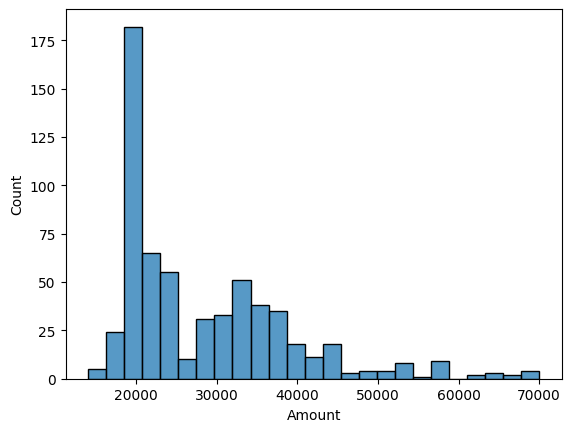

In [15]:
# kde plot of income per account
sns.histplot(incomes, fill=True,bins=25)

<Axes: xlabel='Amount', ylabel='Density'>

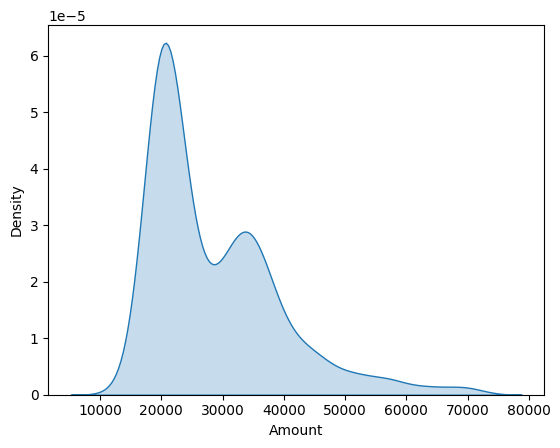

In [16]:
sns.kdeplot(incomes, fill=True)

Salary distribution seems to roughly align with [ONS Data](https://www.ons.gov.uk/peoplepopulationandcommunity/personalandhouseholdfinances/incomeandwealth/bulletins/householddisposableincomeandinequality/yearending2018) in 2018

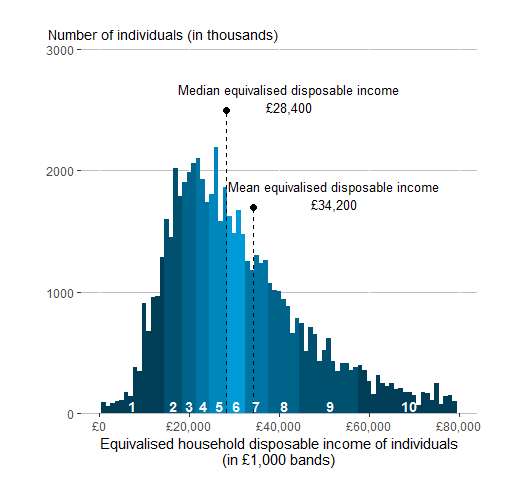

## Accounts who don't receive income

In [17]:
accounts_no_incomings.head(5)

,Unnamed: 0,Account No,Balance,Amount,Third Party Account No,Third Party Name,DateTime,Date,Timestamp
3,3,283027736.0,1787.0,780.0,472213568.0,NaN,2023-01-01 00:00:00,2023-01-01,00:00:00
8,8,215404070.0,1965.0,780.0,768271776.0,NaN,2023-01-01 00:00:00,2023-01-01,00:00:00
14,14,442079728.0,2426.0,650.0,455831435.0,NaN,2023-01-01 00:00:00,2023-01-01,00:00:00
22,22,605711527.0,1928.0,660.0,442070890.0,NaN,2023-01-01 00:00:00,2023-01-01,00:00:00
26,26,548907062.0,2513.0,690.0,865748375.0,NaN,2023-01-01 00:00:00,2023-01-01,00:00:00


#### Personal income/rent payments investigation

In [18]:
# get rows where Third Party Name is not null
bank_amount_incomings_not_null = accounts_no_incomings[accounts_no_incomings['Third Party Name'].notnull()]

bank_amount_incomings_not_null.head(5)


,Unnamed: 0,Account No,Balance,Amount,Third Party Account No,Third Party Name,DateTime,Date,Timestamp
518,518,979135922.0,3391.0,-551.0,NaN,Halifax,2023-01-01 00:00:00,2023-01-01,00:00:00
531,531,673025413.0,869.0,-889.0,NaN,LBG,2023-01-01 00:00:00,2023-01-01,00:00:00
535,535,656781737.0,51.0,-917.0,NaN,LBG,2023-01-01 00:00:00,2023-01-01,00:00:00
553,553,744398361.0,2223.0,-608.0,NaN,Halifax,2023-01-01 00:00:00,2023-01-01,00:00:00
559,559,385685918.0,280.0,-478.0,NaN,Halifax,2023-01-01 00:00:00,2023-01-01,00:00:00


In [19]:
# filter for Account No == 979135922.0
account_979135922 = bank_amount_incomings_not_null[bank_amount_incomings_not_null['Account No'] == 979135922.0]
account_979135922.head(5)

,Unnamed: 0,Account No,Balance,Amount,Third Party Account No,Third Party Name,DateTime,Date,Timestamp
518,518,979135922.0,3391.000000,-551.00,NaN,Halifax,2023-01-01 00:00:00,2023-01-01,00:00:00
1162,1162,979135922.0,3375.010000,-15.99,NaN,Netflix,2023-01-01 00:00:00,2023-01-01,00:00:00
1163,1163,979135922.0,3367.020000,-7.99,NaN,Disney,2023-01-01 00:00:00,2023-01-01,00:00:00
4829,4829,979135922.0,3303.678750,-63.34,NaN,Tesco,2023-01-01 10:19:00,2023-01-01,10:19:00
5763,5763,979135922.0,3278.310243,-25.37,NaN,Matalan,2023-01-02 07:36:00,2023-01-02,07:36:00


In [20]:
bank_account_979135922 = bank[bank['Account No'] == 979135922.0]
#bank_account_979135922.head(5)
x=bank_account_979135922[bank_account_979135922['Third Party Account No'].notnull()]
x

,Unnamed: 0,Account No,Balance,Amount,Third Party Account No,Third Party Name,DateTime,Date,Timestamp
31,31,979135922.0,3942.000000,2220.0,616924659.0,NaN,2023-01-01 00:00:00,2023-01-01,00:00:00
22175,22175,979135922.0,2042.197376,2220.0,616924659.0,NaN,2023-01-31 23:59:00,2023-01-31,23:59:00
39788,39788,979135922.0,2996.374376,2220.0,616924659.0,NaN,2023-02-28 23:59:00,2023-02-28,23:59:00
58076,58076,979135922.0,1379.433801,2220.0,616924659.0,NaN,2023-03-31 23:59:00,2023-03-31,23:59:00
75984,75984,979135922.0,495.648801,2220.0,616924659.0,NaN,2023-04-30 23:59:00,2023-04-30,23:59:00
94287,94287,979135922.0,1940.378801,2220.0,616924659.0,NaN,2023-05-31 23:59:00,2023-05-31,23:59:00
114062,114062,979135922.0,1475.420801,2220.0,616924659.0,NaN,2023-06-30 23:59:00,2023-06-30,23:59:00
134696,134696,979135922.0,1.238301,2220.0,616924659.0,NaN,2023-07-31 23:59:00,2023-07-31,23:59:00
155839,155839,979135922.0,1590.480801,2220.0,616924659.0,NaN,2023-08-31 23:59:00,2023-08-31,23:59:00
177461,177461,979135922.0,344.343301,2220.0,616924659.0,NaN,2023-09-30 23:59:00,2023-09-30,23:59:00


In [21]:
bank_account_673025413 = bank[bank['Account No'] == 673025413.0]
y=bank_account_673025413[bank_account_673025413['Third Party Account No'].notnull()]
y

,Unnamed: 0,Account No,Balance,Amount,Third Party Account No,Third Party Name,DateTime,Date,Timestamp
16132,16132,673025413.0,169.786106,380.0,990461108.0,NaN,2023-01-21 16:19:00,2023-01-21,16:19:00
20440,20440,673025413.0,2968.193106,3300.0,990461108.0,NaN,2023-01-30 23:59:00,2023-01-30,23:59:00
38415,38415,673025413.0,4746.247106,3300.0,990461108.0,NaN,2023-02-27 23:59:00,2023-02-27,23:59:00
56676,56676,673025413.0,4178.708106,3300.0,990461108.0,NaN,2023-03-30 23:59:00,2023-03-30,23:59:00
74609,74609,673025413.0,4608.679087,3300.0,990461108.0,NaN,2023-04-29 23:59:00,2023-04-29,23:59:00
84318,84318,673025413.0,2621.847346,-20.0,990461108.0,NaN,2023-05-09 05:32:00,2023-05-09,05:32:00
92459,92459,673025413.0,1490.072140,-610.0,990461108.0,NaN,2023-05-29 08:29:00,2023-05-29,08:29:00
93313,93313,673025413.0,4789.965793,3300.0,990461108.0,NaN,2023-05-30 23:59:00,2023-05-30,23:59:00
112870,112870,673025413.0,3237.189423,3300.0,990461108.0,NaN,2023-06-29 23:59:00,2023-06-29,23:59:00
130122,130122,673025413.0,-24.993443,610.0,990461108.0,NaN,2023-07-24 07:15:00,2023-07-24,07:15:00


In [22]:
# filter bank for Account No == 108481285.0
bank_account_108481285 = bank[bank['Account No'] == 108481285.0]

# positive Amounts
bank_account_108481285_incomings = bank_account_108481285[bank_account_108481285['Amount'] > 0]

#### Further salary computations

In [23]:
# filter account_no_incomings for positive transactions
account_no_incomings_pos = accounts_no_incomings[accounts_no_incomings['Amount'] > 0]

# group by Account No and sum the 'Amount' for each account but normalise dividing by number of transactions for each account
income_per_account_no_incomings = account_no_incomings_pos.groupby('Account No')['Amount'].sum()

In [24]:
# see if there are common Account No in income_per_account and income_per_account_no_incomings
common_accounts = set(income_per_account.index) & set(income_per_account_no_incomings.index)

print(f'Number of common accounts: {len(common_accounts)}')

Number of common accounts: 0


In [25]:
# get count of transactions for each account
# filter transactions at time 00:00:00 and 23:59:00
account_no_incomings_pos_midnight = account_no_incomings_pos[(account_no_incomings_pos['Timestamp'] != '00:00:00') & (account_no_incomings_pos['Timestamp'] != '23:59:00')]

#transcton count
transaction_count = account_no_incomings_pos_midnight.groupby('Account No')['Amount'].count()
#transaction_count

<Axes: xlabel='Amount', ylabel='Density'>

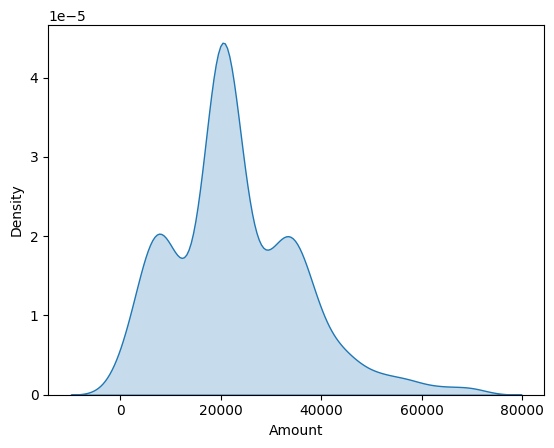

In [33]:
# Stack the income_per_account_no_incomings and incomes
stacked = pd.concat([income_per_account_no_incomings, incomes], axis=0)

# drop rows with null values
stacked = stacked.dropna()

sns.kdeplot(stacked, fill=True)

(array([ 22.,  42.,  68.,  45.,  25.,  32.,  88., 201.,  59.,  32.,  26.,
         68.,  45.,  39.,  20.,   8.,  19.,   8.,   8.,   1.,   9.,   0.,
          5.,   0.,   6.]),
 array([3.000000e+01, 2.828640e+03, 5.627280e+03, 8.425920e+03,
        1.122456e+04, 1.402320e+04, 1.682184e+04, 1.962048e+04,
        2.241912e+04, 2.521776e+04, 2.801640e+04, 3.081504e+04,
        3.361368e+04, 3.641232e+04, 3.921096e+04, 4.200960e+04,
        4.480824e+04, 4.760688e+04, 5.040552e+04, 5.320416e+04,
        5.600280e+04, 5.880144e+04, 6.160008e+04, 6.439872e+04,
        6.719736e+04, 6.999600e+04]),
 <BarContainer object of 25 artists>)

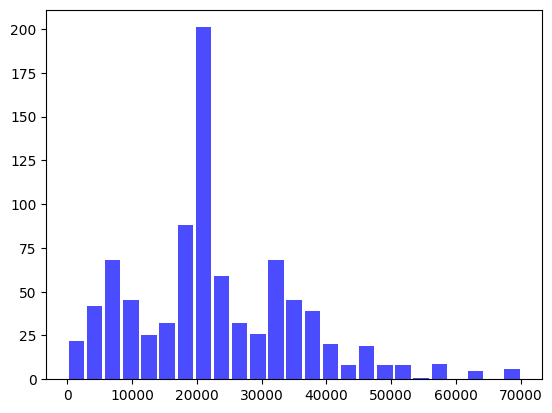

In [34]:
plt.hist(stacked, bins=25, color='blue', alpha=0.7, rwidth=0.85)

## Gross income including positive regular transactions from any account

In [32]:
bank.shape

# filter for positive
bank_amount_positive = bank[bank['Amount'] > 0]


,Unnamed: 0,Account No,Balance,Amount,Third Party Account No,Third Party Name,DateTime,Date,Timestamp
0,0,678330503.0,2971.00,1584.00,NaN,Westport Care Home,2023-01-01 00:00:00,2023-01-01,00:00:00
1,1,472213568.0,3792.00,1950.00,NaN,Barbiee Boutique,2023-01-01 00:00:00,2023-01-01,00:00:00
3,3,283027736.0,1787.00,780.00,472213568.0,NaN,2023-01-01 00:00:00,2023-01-01,00:00:00
4,4,624500124.0,3226.00,1825.00,NaN,Fat Face,2023-01-01 00:00:00,2023-01-01,00:00:00
5,5,203466392.0,4607.66,2841.66,NaN,Lavender Primary,2023-01-01 00:00:00,2023-01-01,00:00:00
